<a href="https://colab.research.google.com/github/ChingizIbnVaxob/AI_introduction/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load the Data and Perform Basic Checks

In [7]:
url = "https://raw.githubusercontent.com/ChingizIbnVaxob/AI_introduction/main/vertebral_column.csv"
data = pd.read_csv(url)

In [8]:
data.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [9]:
# Check the number of observations and features
print(f"Number of observations: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")

Number of observations: 310
Number of features: 7


In [10]:
# Check for missing values
print(data.isnull().sum())

pelvic incidence               0
 pelvic tilt                   0
 lumbar lordosis angle         0
 sacral slope                  0
 pelvic radius                 0
 grade of spondylolisthesis    0
Class_att                      0
dtype: int64


In [11]:
# Data types and basic statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pelvic incidence             310 non-null    float64
 1    pelvic tilt                 310 non-null    float64
 2    lumbar lordosis angle       310 non-null    float64
 3    sacral slope                310 non-null    float64
 4    pelvic radius               310 non-null    float64
 5    grade of spondylolisthesis  310 non-null    float64
 6   Class_att                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None
       pelvic incidence   pelvic tilt   lumbar lordosis angle   sacral slope  \
count        310.000000    310.000000              310.000000     310.000000   
mean          60.496653     17.542822               51.930930      42.953831   
std           17.236520     10.008330               18.554064      13.423102

In [12]:
# Rename the target column to 'class' for consistency
#data.rename(columns={'Class_att': 'class'}, inplace=True)

#  2. Exploratory Data Analysis

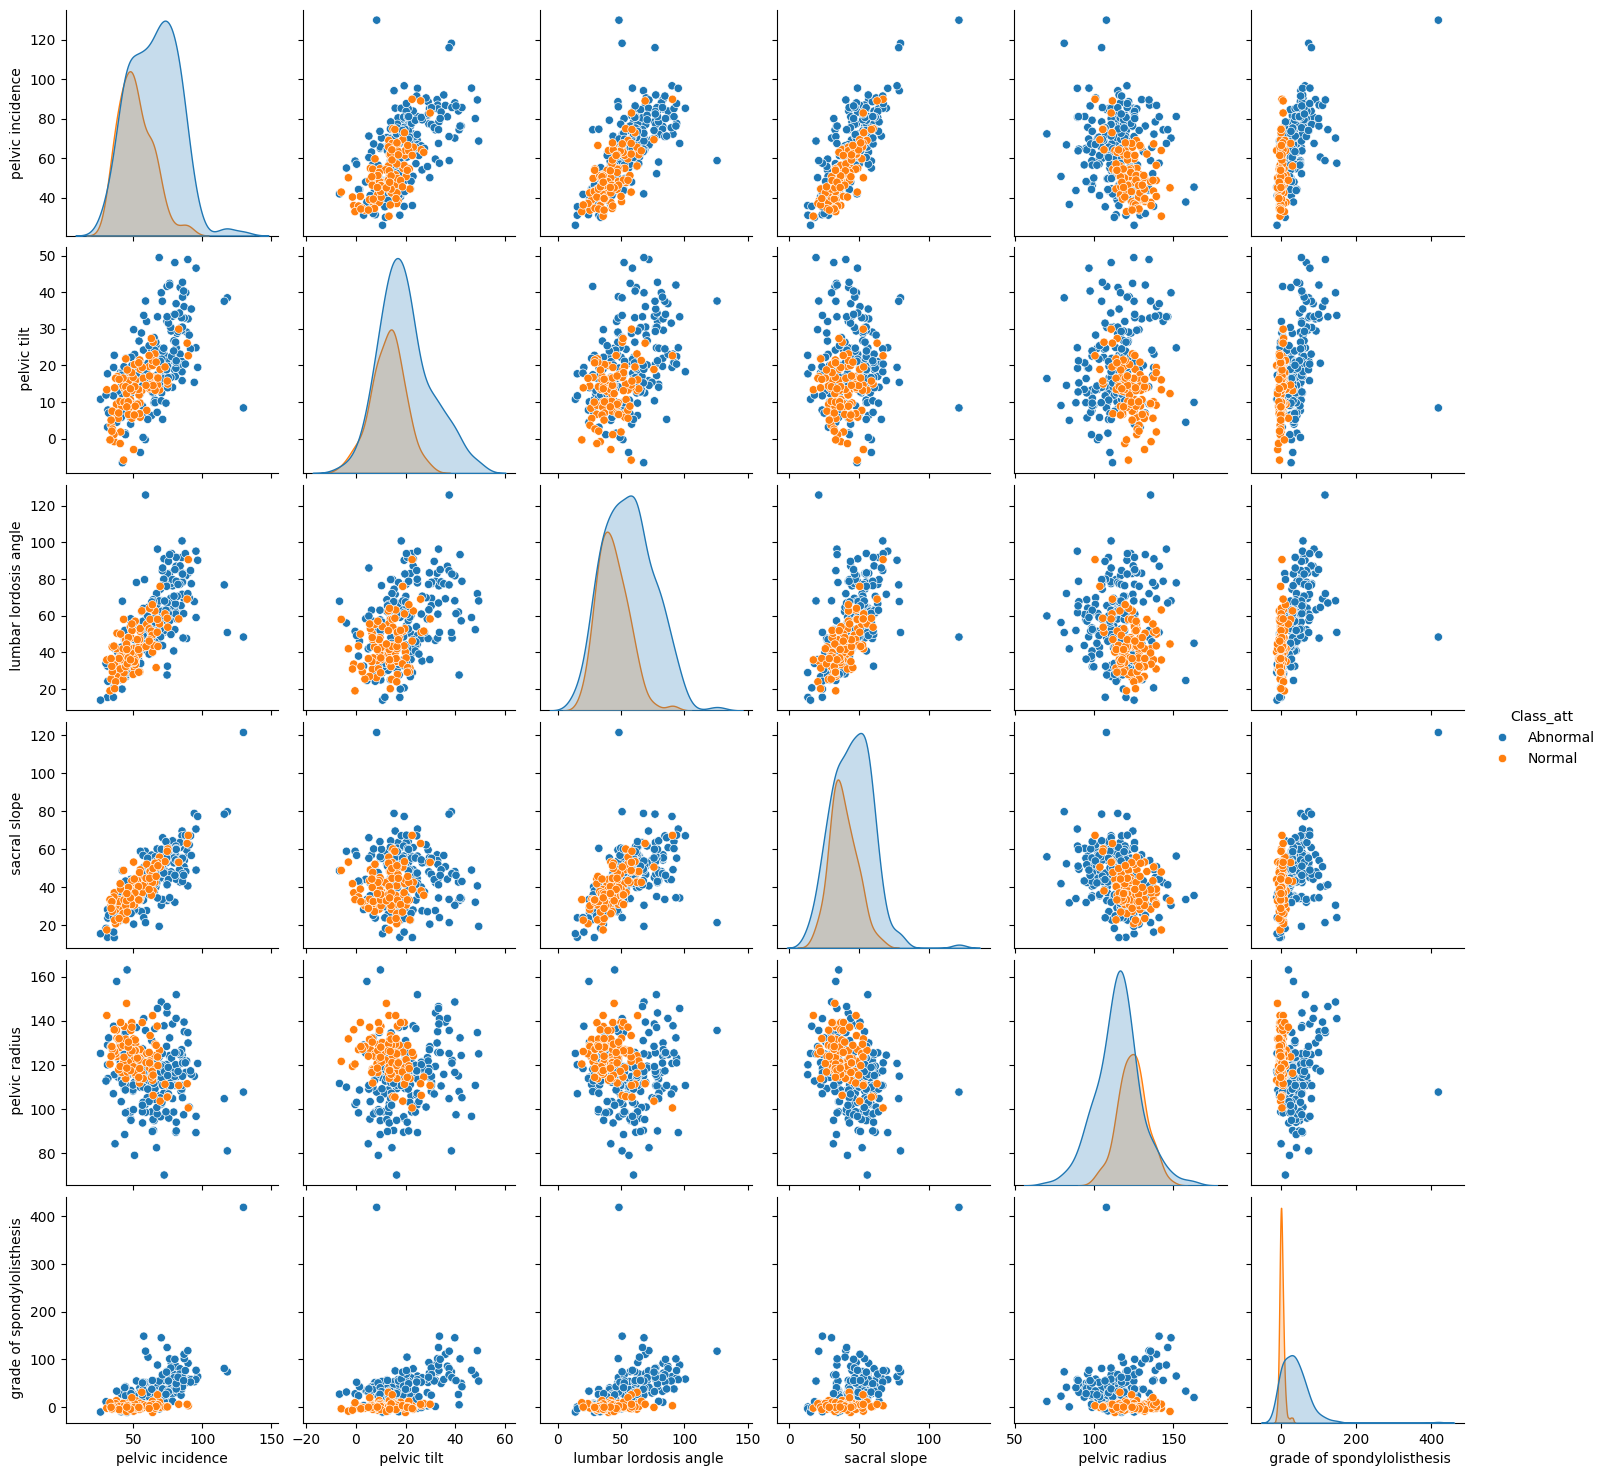

In [13]:
sns.pairplot(data, hue='Class_att')
plt.show()

In [14]:
# Convert target variable to binary (0 for 'Normal', 1 for 'Abnormal')
data['Class_att'] = data['Class_att'].apply(lambda x: 1 if x == 'Abnormal' else 0)

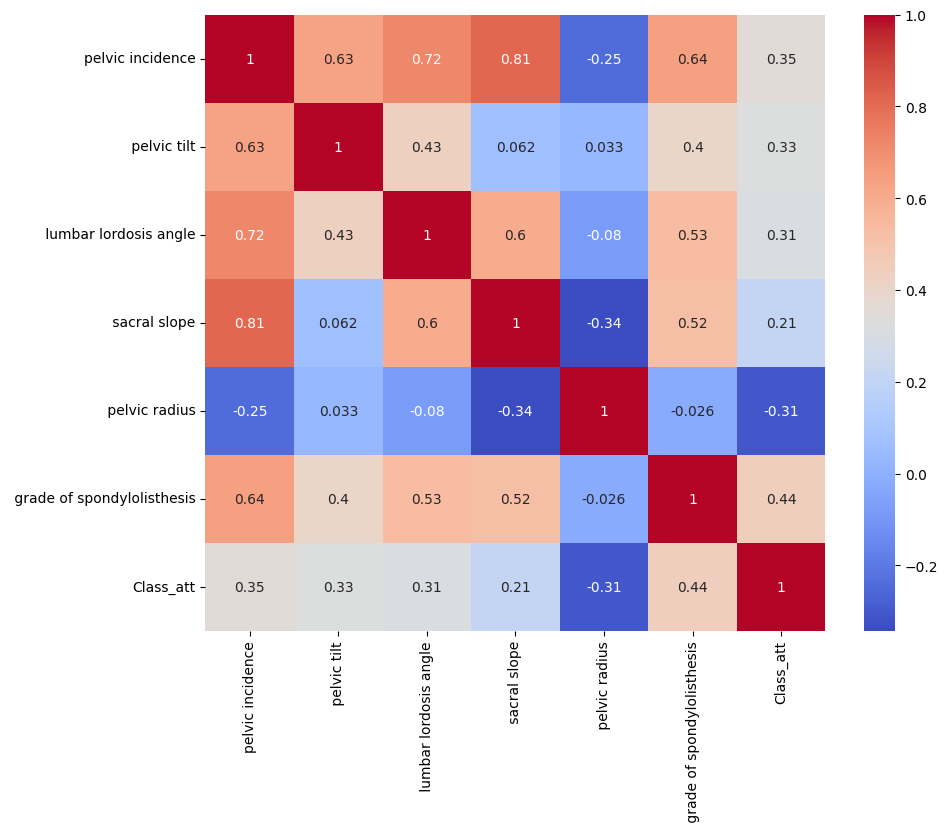

In [15]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 3.Data Preprocessing

In [16]:
# Split the data into features and target
X = data.drop('Class_att', axis=1)
y = data['Class_att']

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4.Build and Evaluate Logistic Regression Model

In [19]:
# Build the logistic regression model
model = LogisticRegression(max_iter=10000, random_state=42)

In [20]:
# Without scaling
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Without Scaling")
print(classification_report(y_test, y_pred))

Without Scaling
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.89      0.91      0.90        44

    accuracy                           0.85        62
   macro avg       0.83      0.82      0.82        62
weighted avg       0.85      0.85      0.85        62



In [21]:
# With Standard Scaling
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print("With Standard Scaling")
print(classification_report(y_test, y_pred_scaled))

With Standard Scaling
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.91      0.91      0.91        44

    accuracy                           0.87        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.87      0.87      0.87        62



# 5. Hyperparameter Tuning

In [22]:
# Define the parameter grid
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # only used if penalty is 'elasticnet'
}

In [26]:
# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), param_dist, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  wa

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [27]:
# Print the best parameters and best model

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("With Hyperparameter Tuning")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 0.615848211066026, 'l1_ratio': 0.75, 'penalty': 'elasticnet', 'solver': 'saga'}
With Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.93      0.91      0.92        44

    accuracy                           0.89        62
   macro avg       0.86      0.87      0.87        62
weighted avg       0.89      0.89      0.89        62



# Final Assessment

The logistic regression model showed an improvement in performance after scaling the features, achieving higher precision, recall, and f1-score. Hyperparameter tuning further improved the model's accuracy and performance metrics. The final tuned model achieved `an accuracy of 89%` on the test set, demonstrating that appropriate scaling and hyperparameter optimization can significantly enhance model performance.



